In [ ]:
import pandas as pd
df=pd.read_csv("/content/cybersecurity_intrusion_data.csv")
df

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9532,SID_09533,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,0,1
9533,SID_09534,380,TCP,3,182.848475,NaN,0.408485,0,Chrome,0,0
9534,SID_09535,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0,0
9535,SID_09536,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0


In [ ]:
import warnings
warnings.filterwarnings('ignore')

<Axes: >

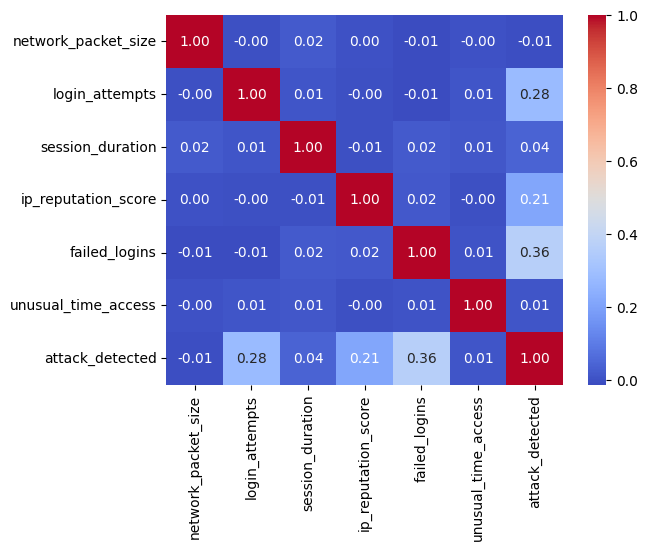

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')

<Axes: xlabel='attack_detected', ylabel='failed_logins'>

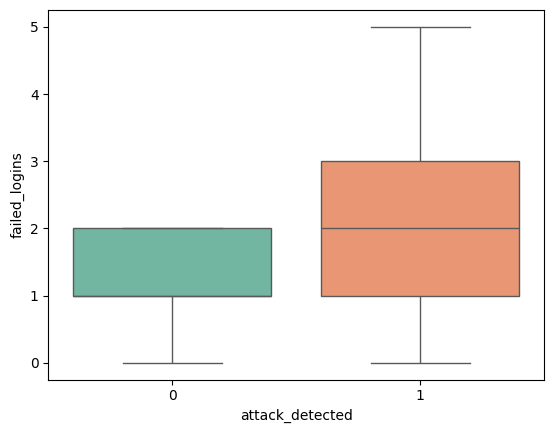

In [ ]:
sns.boxplot(x='attack_detected', y='failed_logins', data=df, palette='Set2')

<Axes: xlabel='protocol_type', ylabel='count'>

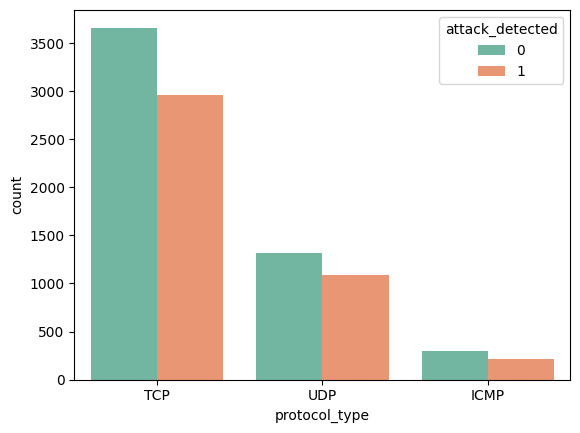

In [ ]:
sns.countplot(data=df, x='protocol_type', hue='attack_detected', palette='Set2')

<Axes: xlabel='ip_reputation_score', ylabel='Density'>

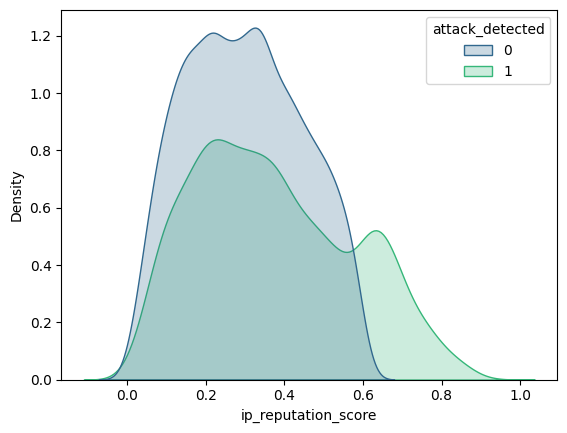

In [ ]:
sns.kdeplot(data=df, x='ip_reputation_score', hue='attack_detected', fill=True, palette='viridis')

<Axes: xlabel='encryption_used', ylabel='count'>

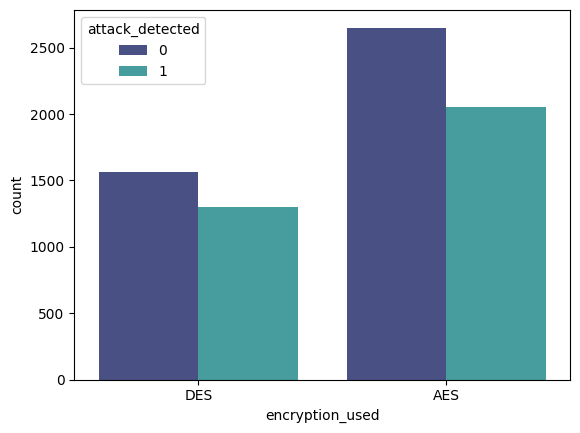

In [ ]:
sns.countplot(data=df, x='encryption_used', hue='attack_detected', palette='mako')

In [ ]:
df.isna().sum()

,0
session_id,0
network_packet_size,0
protocol_type,0
login_attempts,0
session_duration,0
encryption_used,1966
ip_reputation_score,0
failed_logins,0
browser_type,0
unusual_time_access,0


In [ ]:
df.dtypes

,0
session_id,object
network_packet_size,int64
protocol_type,object
login_attempts,int64
session_duration,float64
encryption_used,object
ip_reputation_score,float64
failed_logins,int64
browser_type,object
unusual_time_access,int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import classification_report

df.drop('session_id',axis=1,inplace=True)

label_encoders={}
for col in ['protocol_type','encryption_used','browser_type','unusual_time_access']:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    label_encoders[col]=le

x=df.drop('attack_detected',axis=1)
y=df['attack_detected']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

model.feature_names_in_=x.columns.tolist()

pickle.dump(model,open('cybersecurity_model.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1042
           1       1.00      0.78      0.87       866

    accuracy                           0.90      1908
   macro avg       0.92      0.89      0.89      1908
weighted avg       0.91      0.90      0.89      1908

